<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_8/Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.stats as stats

### Calculating the Confidence Interval

A sample of 25 doritos bags had a mean weight of 1.02 ounces per bag. Construct the 95% confidence interval for the mean weight of all doritos bags. Assume the weight is normally distributed with a population standard deviation of 0.03 ounces.

In [3]:
def calc_conf_interval(x_bar, std, n, z):
  # confidence interval
  conf_ = z*(std/math.sqrt(n))
  
  print(x_bar,'+-', round(conf_, 3))
  print(f"Value will range between {x_bar - conf_} and {x_bar + conf_}")
  


In [16]:
a = (1 - .85)/2

In [17]:
a

0.07500000000000001

In [18]:
stats.norm.ppf(a)

-1.4395314709384557

In [20]:
x_bar = 1.02
std = .03
n = 25
z = 1.96

In [5]:
calc_conf_interval(x_bar, std, n, z)

1.02 +- 0.012
Value will range between 1.00824 and 1.03176


## The Width of a Confidence Interval

Let's explore the relationship between the margin of error and the confidence interval for the population mean as we consider different width of a confidence interval that is influenced by various factors.

Review the prior example, what if we change the standard deviation to be 0.05 ounces rather than 0.03?

In [21]:
std = 0.05

In [22]:
x_bar, std, n, z

(1.02, 0.05, 25, 1.96)

In [23]:
calc_conf_interval(x_bar, std, n, z)

1.02 +- 0.02
Value will range between 1.0004 and 1.0396


Let's visualize to see how the distribution has changed.

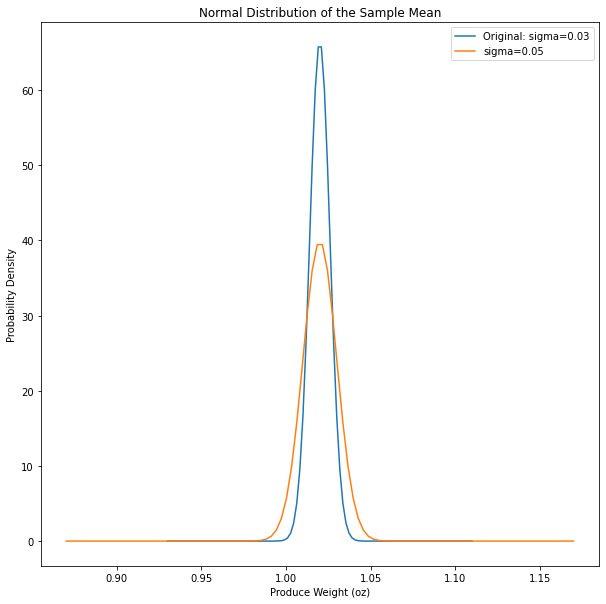

In [24]:
# plot normal distribution
fig, ax = plt.subplots(figsize=(10,10))
x1 = np.linspace(x_bar - 3*.03, x_bar + 3*.03, 100)
plt.plot(x1, stats.norm.pdf(x1, x_bar, .03/math.sqrt(n)), label='Original: sigma=0.03')

# compare with original
x = np.linspace(x_bar - 3*std, x_bar + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, x_bar, std/math.sqrt(n)), label='sigma=0.05')
plt.title('Normal Distribution of the Sample Mean')
plt.xlabel('Produce Weight (oz)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

The width has increased from 0.24 to 0.4 (we multiply the margin of error by two for both tails). The larger the population standard deviation the wider the confidence interval.

What if we change the sample size, from 25 to 16?

In [25]:
n = 16
std = 0.03 # change this back

In [26]:
x_bar, std, n, z

(1.02, 0.03, 16, 1.96)

In [27]:
calc_conf_interval(x_bar, std, n, z)

1.02 +- 0.015
Value will range between 1.0053 and 1.0347


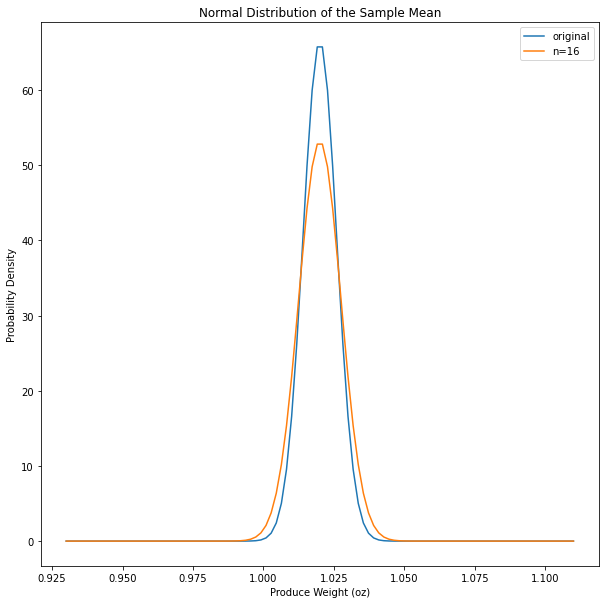

In [28]:
# plot normal distribution
fig, ax = plt.subplots(figsize=(10,10))
x = np.linspace(x_bar - 3*std, x_bar + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, x_bar, std/math.sqrt(25)), label='original')
# compare with original
plt.plot(x, stats.norm.pdf(x, x_bar, .03/math.sqrt(n)), label='n=16')
plt.title('Normal Distribution of the Sample Mean')
plt.xlabel('Produce Weight (oz)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

The width of the confidence interval has increased from 0.24 to .03. The smaller the sample size n, the wider the confidence interval.

What if we change from 95% to 99% confidence? Now we use a z value of 2.576 rather than 1.96

In [29]:
# recall we can use the ppf to calculate the z score to use
a = (1- .99)/2
z = stats.norm.ppf(a)
round(a, 3), z

(0.005, -2.5758293035489004)

In [30]:
n = 25 # change this back

In [31]:
x_bar, std, n, z

(1.02, 0.03, 25, -2.5758293035489004)

In [32]:
calc_conf_interval(x_bar, std, n, z)

1.02 +- -0.015
Value will range between 1.0354549758212934 and 1.0045450241787066


## Example 8.2

Sample of the weight (in grams) of 80 hockey pucks. Construct the 90% confidence interval for the population mean weight assuming that the population standard deviation is 7.5 grams. 

In [ ]:
# assign variables
n = 80
a = (1-.90)/2 # take error percent, divide by 2 for each tail
std = 7.5

In [ ]:
z = stats.norm.ppf(a)
round(a, 3), z

In [ ]:
df = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch08_Data_Files.xlsx", 
                   sheet_name="Hockey_Pucks")

In [ ]:
df.head()

In [ ]:
# check the number of observations
df.shape

In [ ]:
# calc sample mean
x_bar = df['Weight'].mean()
x_bar

In [ ]:
calc_conf_interval(x_bar, std, n, z)

## Confidence Interval for the Population Mean when the standard deviation is unknown.

Estimate the mean mpg of all cars with 90% confidence.

In [35]:
textbook = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch08_Data_Files.xlsx",
                         sheet_name="MPG")

In [36]:
textbook.shape

(25, 1)

In [38]:
textbook.head()

,MPG
0,97
1,117
2,93
3,79
4,97


In [40]:
# number of observations
n = textbook.shape[0]
n

25

For calculating the 90% confidence interval, let's define a and the df

In [41]:
a = (1-.90)/2
a

0.04999999999999999

In [42]:
df = n - 1
df

24

How to obtain the t statistic, below is to Calculate 90% confidence interval
a = 0.10
a/2 = 0.05
df = 25 - 1 = 24


We use the students t continuous random variable: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [45]:
df

24

In [48]:
t_stat = stats.t.ppf(1-(a), df)

In [53]:
t_stat

1.7108820799094275

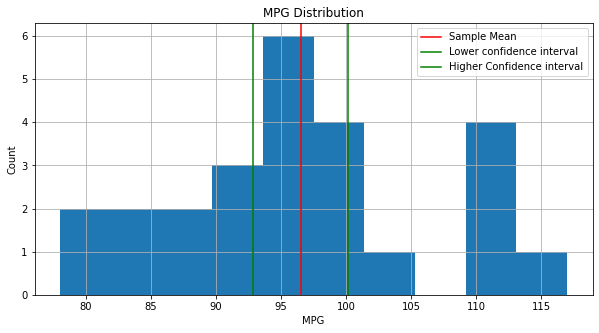

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
textbook.hist(ax=ax)
plt.title('MPG Distribution')
plt.xlabel('MPG')
plt.axvline(x=textbook['MPG'].mean(), label='Sample Mean', c='r')
plt.axvline(x=92.85972516071554, label='Lower confidence interval', c='g')
plt.axvline(x=100.18027483928445, label='Higher Confidence interval', c='g')
plt.legend()
plt.ylabel('Count')
plt.show()

What do we notice about the distribution? We assume a normal distribution, thus we can construct the confidence interval as 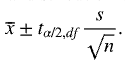

We can use the above formula and plug in our values of the standard deviation and t statistic, we can also use the below function that calculates the standard error of the mean and uses the t statistic in the function to calculate.

In [55]:
def mean_confidence_interval(data, confidence=0.95):
    # create array from data
    a = 1.0 * np.array(data)
    # what is the sample size?
    n = len(a)
    # calculates the standard error of the mean
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [56]:
mean_confidence_interval(textbook['MPG'], confidence=0.90)

(96.52, 92.85972516071554, 100.18027483928445)

Next we will compare this to a new dataset that was used for machine learning task, but we will consider this to be a population of cars and explore a sample estimate.

http://archive.ics.uci.edu/ml/index.php From the UC Irvine Machine Learning Repository.

In [58]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\t', header=None)

In [60]:
df.rename(columns={0:'data'},inplace=True)

In [61]:
df['mpg'] = df['data'].str.split(' ', 1, expand=True)[0].astype(float)

In [62]:
df= df[['mpg']]

In [63]:
df.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Let's assume this dataframe represents the population of all cars in a dealership. We will take a sample and test the mean against the "population".

In [64]:
df.shape

(398, 1)

In [65]:
pop_mean = df.mean()[0]
pop_mean

23.514572864321615

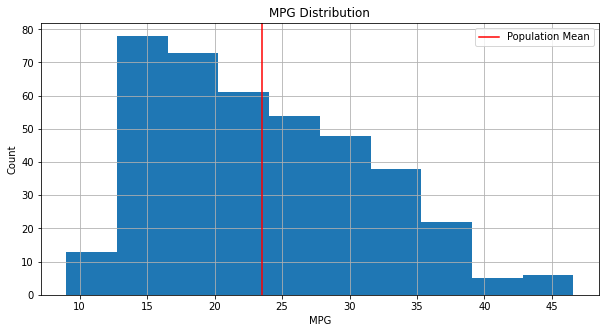

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
df.hist(ax=ax)
plt.title('MPG Distribution')
plt.xlabel('MPG')
plt.axvline(x=pop_mean, label='Population Mean', c='r')
plt.legend()
plt.ylabel('Count')
plt.show()

Distribution is relatively normal with jump between 10 mpg to 15 mpg. The mean is somewhat skewed to the left due to the distribution concentration at 15 mpg.

## Example of Point Estimate

Take sample of 25 cars from population. 

Don't forget to set the random state.

In [67]:
n = 25
sample_0 = df['mpg'].sample(n=n, random_state=42)

In [68]:
sample_0

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
84     27.0
373    24.0
94     13.0
222    17.0
126    21.0
9      15.0
383    38.0
56     26.0
72     15.0
132    25.0
42     12.0
370    31.0
275    17.0
229    16.0
377    31.0
77     22.0
15     22.0
389    22.0
238    33.5
0      18.0
Name: mpg, dtype: float64

In [69]:
sample_0.mean()

22.1

In [70]:
sample_0.std()

7.351303739246982

Let's plot the distribution

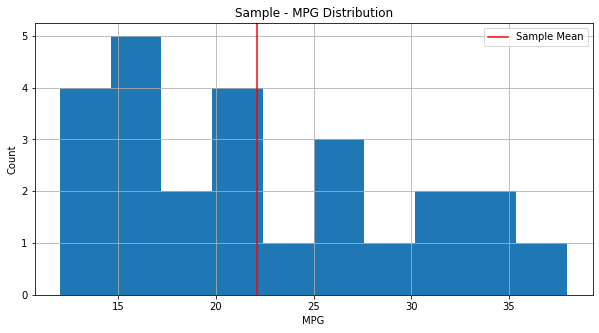

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
sample_0.hist(ax=ax)
plt.title('Sample - MPG Distribution')
plt.xlabel('MPG')
plt.axvline(x=sample_0.mean(), label='Sample Mean', c='r')
plt.legend()
plt.ylabel('Count')
plt.show()

When visualizing the sample of 25 we see a lower resolution of the distribution from the population. The sample mean seems to be slightly lower as well. The general shape of the sample distribution aligns with the population.

Sample of 25 cars yields a mean mpg of 22.1.

Estimate the mean mpg of all cars with 95% confidence.

In [72]:
deg_free = sample_0.shape[0]-1
deg_free

24

In [73]:
a = (1-.95)/2

In [74]:
# obtain t statistic
t = stats.t.ppf(1-(a), deg_free)
t

2.0638985616280205

In [75]:
sample_0.mean()

22.1

In [76]:
# make function that uses the t-score value
upper_bound = sample_0.mean()+t*(sample_0.std()/math.sqrt(sample_0.shape[0]))
lower_bound = sample_0.mean()-t*(sample_0.std()/math.sqrt(sample_0.shape[0]))

In [79]:
f"Interpretation: for a .95 confidence interval, the mean car's mpg will fall above {lower_bound} and below {upper_bound}."

"Interpretation: for a .95 confidence interval, the mean car's mpg will fall above 19.065530957295493 and below 25.13446904270451."

Check agains our other function.

In [80]:
mean_confidence_interval(sample_0, confidence=0.95)

(22.1, 19.065530957295493, 25.13446904270451)

### Calculate for other confidence levels or alpha *a*, in hypothesis testing this is referred to as the significance level.

The significance level of an event is the probability that the event could have occurred by chance. Can also be thought of as the probability of rejecting the null hypothesis given that it is true (a type I error).

In terms of testing for the mean:
this is the probability that the estimation procedure will generate an interval that does not contain μ.

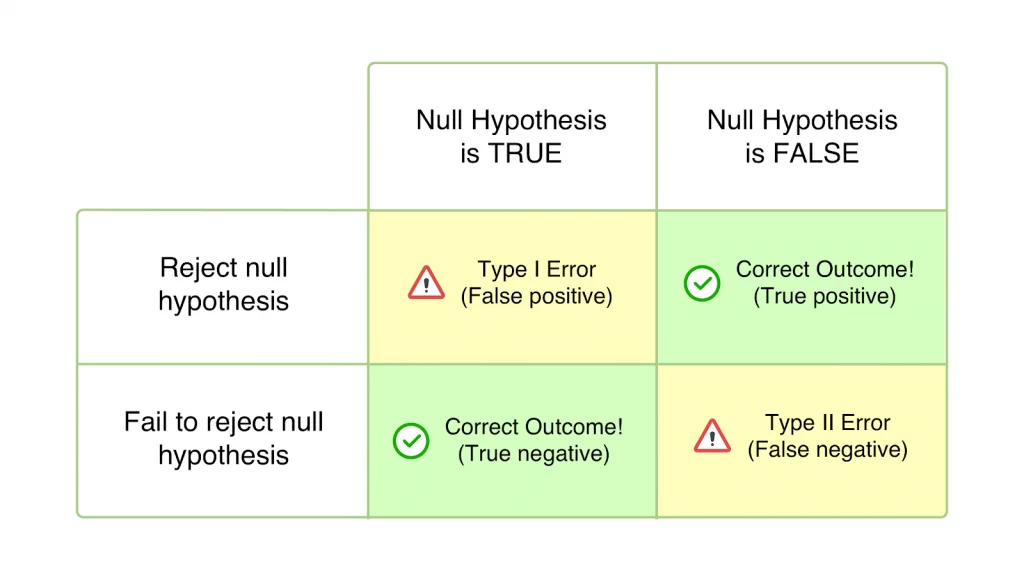



### Confidence coefficient (1 - *a*) is interpreted as the probability that the estimation procedure will generate an interval that contains μ.

Based on this experiment, can we assume we got a true outcome?

Interpretation: there is a .95 probability that the mean car's mpg will fall above 19.065530957295493 and below 25.13446904270451.

And the population mean is: 23.5

Therefore our 95% confidence resulted in an interval that does contain the mean of the population.

In [81]:
pop_mean

23.514572864321615

What if the populations standard deviation was actually 9 mpg?

In [82]:
upper_bound_2 = sample_0.mean()+t*(9/math.sqrt(len(sample_0)))
lower_bound_2 = sample_0.mean()-t*(9/math.sqrt(len(sample_0)))

In [83]:
f"Interpretation: there is a .95 probability that the mean car's mpg will fall above {lower_bound} and below {upper_bound}."

"Interpretation: there is a .95 probability that the mean car's mpg will fall above 19.065530957295493 and below 25.13446904270451."

In [84]:
f"The width has increased to {upper_bound_2 - lower_bound_2} from {upper_bound - lower_bound}"

'The width has increased to 7.430034821860872 from 6.068938085409016'

Let's take a smaller sample and see what happens.

In [85]:
n = 15
sample_1 = df['mpg'].sample(n=n, random_state=2)

In [86]:
mean_confidence_interval(sample_1, confidence=0.95)

(21.326666666666664, 17.076829931908915, 25.576503401424414)

In [ ]:
# comment on the width change

Instead of 95% confidence, what about 99% confidence from original sample?

In [87]:
mean_confidence_interval(sample_0, confidence=0.95)

(22.1, 19.065530957295493, 25.13446904270451)

In [88]:
mean_confidence_interval(sample_0, confidence=0.99)

(22.1, 17.987769632023216, 26.212230367976787)

In [ ]:
# comment on the width change

The wider the interval, the lower its precision. Think back to the package delivery. 

What is the certainty of 3-5 days vs 2-7 days?

In the next chapter we will start to build upon the t distribution and get into t-tests!